In [60]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from numpy.linalg import norm
from sklearn import datasets
iris=datasets.load_iris()
X=iris.data
y=iris.target

In [61]:
def my_kmeans(X,k):
    (n,m)=X.shape
    c_i=random.randint(0,n,k)
    labels=[]
    centers=X[c_i]
    for i,d in enumerate(X):
        dist=np.zeros((k,1))
        for j,c in enumerate(centers):
            dist[j]=norm(d-c,ord=2)
        labels.append(dist.argmin())
    #labeled=np.concatenate((X,labels),axis=1)
    for j in np.unique(labels):
        x=np.zeros((1,m))
        count=0
        for i,d in enumerate(X):
            if labels[i]==j:
                count +=1
                x = x+d
        centers[j]=x/count
    
    
    fig,ax=plt.subplots(m,m)
    for i in range(m):
        for j in range(m):
            if i !=j:
                ax[i,j].scatter(X[:,i],X[:,j],c=labels)
                ax[i,j].scatter(centers[:,i],centers[:,j],c='r')
    


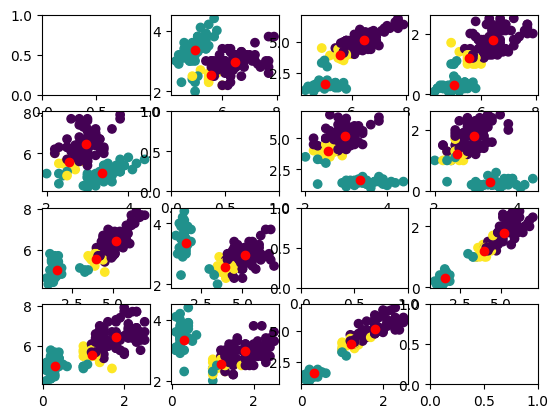

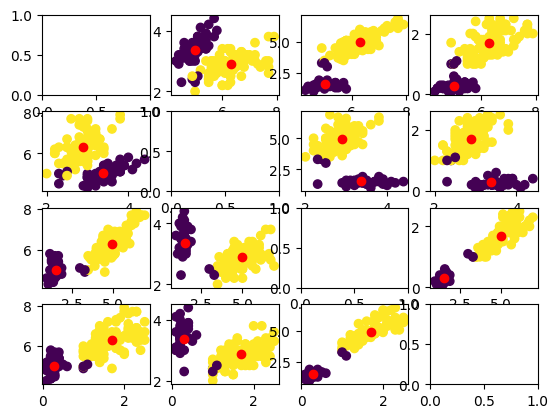

In [62]:
my_kmeans(X,3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2).fit(X)
iris_cluster=kmeans.transform(X)
centers=kmeans.cluster_centers_

labels=kmeans.labels_
fig,ax=plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        if i!=j:
            ax[i,j].scatter(X[:,i],X[:,j],c=labels)
            ax[i,j].scatter(centers[:,i],centers[:,j],c='r')

In [67]:
from sklearn.metrics import silhouette_score

def best_silhouette_score(X):
    bests=np.zeros((9,))
    
    for i in range(2,11):
        k_means=KMeans(n_clusters=i).fit(X)
        y=k_means.labels_
        mean_iter_silhouette=0
        for j in range(10):
            mean_iter_silhouette +=silhouette_score(X,y)
        bests[i-2]=mean_iter_silhouette/10
    return max(bests),bests.argmax()+2


In [19]:
print(best_silhouette_score(X))

(0.6810461692117462, 2)


In [43]:
import pandas as pd
df=pd.read_csv("/home/ing/Bureau/tp_SDN/choixprojetstab.csv",sep=';',header=None)
df=df.drop(labels=0,axis=0)
df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
1,bl/.vSDYCGrSs,1,1,1,1,1,3,1,2,2,...,2,1,3,3,1,2,1,1,1,3
2,bl/1NiMubceBs,1,1,1,1,1,3,1,1,1,...,1,1,1,3,2,1,2,1,1,1
3,bl/dvgMTLVSvk,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,bl1NWhKcNADF2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,bl1ao5B7htJfQ,1,1,0,1,0,0,0,0,0,...,2,0,1,0,3,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,blvqKhCDhQab.,1,1,1,1,2,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
68,blwyn40XjgvEs,1,1,1,1,1,1,1,1,1,...,1,2,1,0,1,1,1,1,1,0
69,bly3Oqsvf6WlU,1,1,1,1,1,3,2,0,0,...,1,2,0,2,0,0,1,1,0,2
70,bly69tf4z1FiM,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [44]:
students=df[df.columns[0]]
students


1     bl/.vSDYCGrSs
2     bl/1NiMubceBs
3     bl/dvgMTLVSvk
4     bl1NWhKcNADF2
5     bl1ao5B7htJfQ
          ...      
67    blvqKhCDhQab.
68    blwyn40XjgvEs
69    bly3Oqsvf6WlU
70    bly69tf4z1FiM
71    blzon470EHguA
Name: 0, Length: 71, dtype: object

In [49]:

data=df.drop(labels=0,axis=1)
data

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
1,1,1,1,1,1,3,1,2,2,1,...,2,1,3,3,1,2,1,1,1,3
2,1,1,1,1,1,3,1,1,1,1,...,1,1,1,3,2,1,2,1,1,1
3,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,0,1,0,0,0,0,0,2,...,2,0,1,0,3,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,1,1,1,2,1,1,1,1,2,...,1,1,1,1,0,1,1,1,1,1
68,1,1,1,1,1,1,1,1,1,0,...,1,2,1,0,1,1,1,1,1,0
69,1,1,1,1,1,3,2,0,0,2,...,1,2,0,2,0,0,1,1,0,2
70,1,1,0,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [64]:
X=data.to_numpy()
Xproj=X.astype(int)
Xproj

array([[1, 1, 1, ..., 1, 1, 3],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]])

:

In [80]:
from sklearn.cluster import Birch, AgglomerativeClustering,BisectingKMeans,AffinityPropagation,MeanShift,k_means
from sklearn.pipeline import make_pipeline

clustering={'agg_clst':AgglomerativeClustering(n_clusters=3),'kmean':KMeans(n_clusters=3),'Bkmean':BisectingKMeans(n_clusters=3),'aff_prop':AffinityPropagation(),'Mshift':MeanShift()}
best_s_score=0
best_clustering=''
for name,clust in clustering.items():
    clust=clust.fit(Xproj)
    clabels=clust.labels_
    if silhouette_score(Xproj,clabels) >= best_s_score:
        best_s_score=silhouette_score(Xproj,clabels)
        best_clustering=name

print(best_clustering,best_s_score)

Mshift 0.411181596677861


/home/ing/.local/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


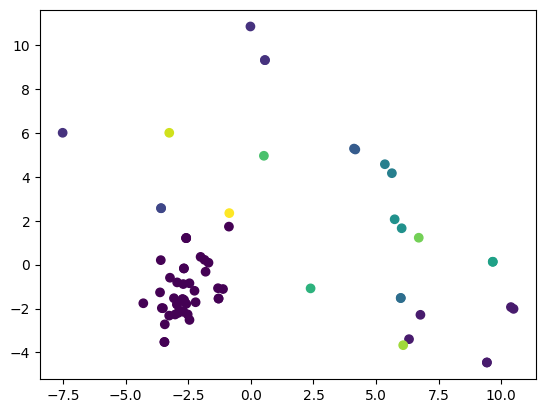

In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X))
Mshift=MeanShift().fit(Xproj)
labls=Mshift.labels_
plt.scatter(pca[:,0],pca[:,1],c=labls)